#Import libraries


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from google.colab import files
import io
from matplotlib import style
import pathlib
import warnings
warnings.filterwarnings('ignore')
import wordcloud

#Loading the dataset

In [2]:
sms_data = files.upload()

Saving SMSspam.csv to SMSspam.csv


In [3]:
data = pd.read_csv("SMSspam.csv",encoding="utf-8")
data

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.tail()

,Class,input Text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.dtypes

Class         object
input Text    object
dtype: object

In [8]:
data.shape

(5574, 2)

In [9]:
data.describe

<bound method NDFrame.describe of      Class                                         input Text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham              Will √º b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]>

In [10]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [11]:
data['Class'].value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

In [12]:
data['input Text'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear                 4
                                                                                                                                                      

In [13]:
data.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
ham         4827   4518                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

            
      freq  
Class       
ham     30  
spam     4

In [14]:
print("length of dataset: ", len(data))

length of dataset:  5574


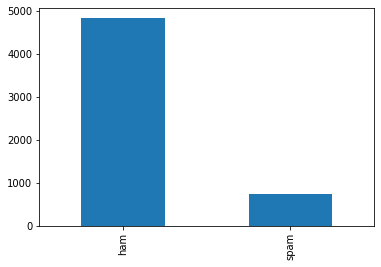

In [15]:
data.Class.value_counts().plot.bar();

Also observed that number of legitimate messages(ham) are much more than spam messages.

In [16]:
data['spam'] = data['Class'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head()

,Class,input Text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
data['length'] = data['input Text'].apply(len)

In [18]:
data.head()

,Class,input Text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


<Figure size 432x288 with 0 Axes>

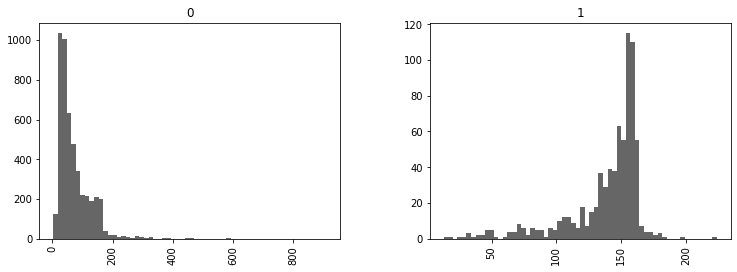

<Figure size 432x288 with 0 Axes>

In [19]:
data.hist(column='length',by='spam',bins=60,figsize=(12,4),color='black',alpha=0.6);
plt.figure()

Text(0.5, 0, 'Message Length')

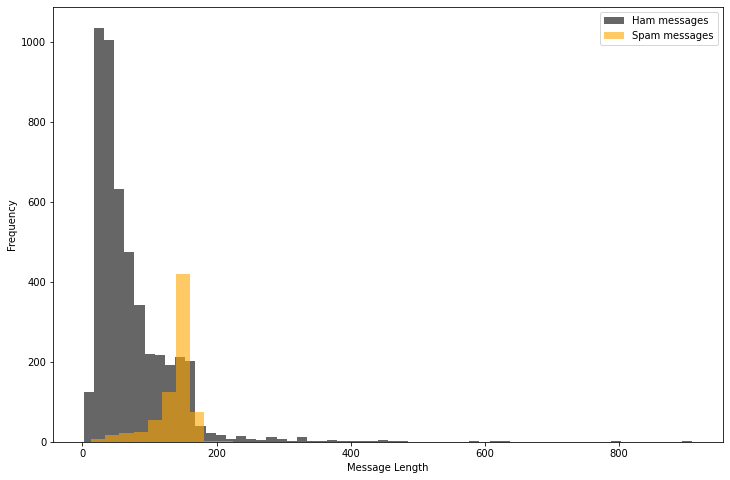

In [20]:
plt.figure(figsize=(12, 8))

data[data.Class=='ham'].length.plot(bins=60, kind='hist', color='black', 
                                       label='Ham messages', alpha=0.6)
data[data.Class=='spam'].length.plot(kind='hist', color='orange', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

We can observe that spam messages tend to have more characters.

The spam messages are generally longer than ham messages: Bulk of ham has length below 100, for spam it is above 100.

In [21]:
ham  = data[data['spam'] == 0].copy()
spam = data[data['spam'] == 1].copy()

In [22]:
def show_wordcloud(data, title):
    text = ' '.join(data['input Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',colormap='inferno', width=800, height=800).generate(text)
    
    plt.figure(figsize=(10,10))#, frameon=True
    plt.imshow(fig_wordcloud)  
    #plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

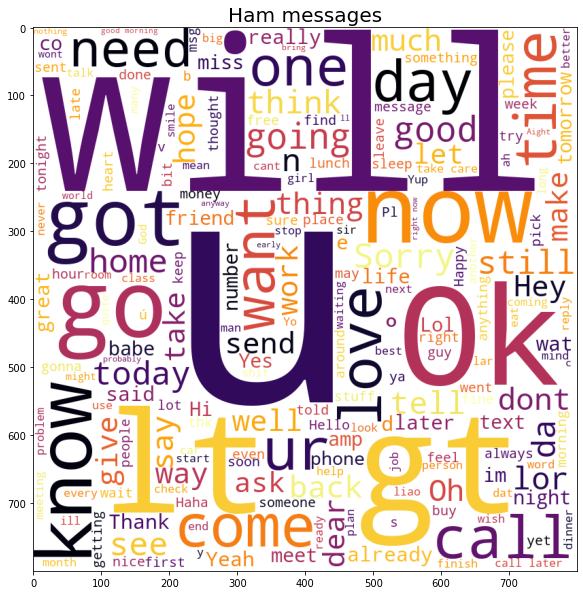

In [23]:
show_wordcloud(ham, "Ham messages")

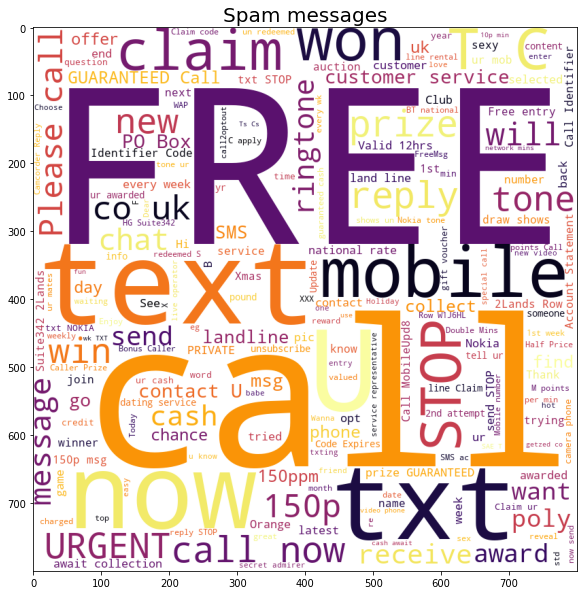

In [24]:
show_wordcloud(spam, "Spam messages")

So we can observe that Spam messages mostly contain words like FREE, text, call, won, prize, etc

#Data Preprocessing

#1. Remove Punctuation and Stopwords

Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters.

In [25]:
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them.

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.corpus import stopwords
stopwords.words("english")[10:15]

["you've", "you'll", "you'd", 'your', 'yours']

With the above lists for punctuation characters and stop words, we define a function to remove these from the text. This function will also convert all text to lowercase.

Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text.

In [32]:
# Preprocessing steps
def remove_punctuation_and_stopwords(message):
     # remove punctuation
    message_without_punc = [ch for ch in message if ch not in string.punctuation]
     # tokenize
    message_without_punc = "".join(message_without_punc).split()
     # remove stopword
    message_without_punc_stopwords = \
        [word.lower() for word in message_without_punc if word.lower() not in stopwords.words("english")]
        
    return message_without_punc_stopwords

In [37]:
data['input_text_clean'] = data['input Text'].apply(remove_punctuation_and_stopwords)

In [38]:
data.head()

,Class,input Text,spam,length,input_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,"[nah, dont, think, goes, usf, lives, around, t..."


In [33]:
check = data['input Text'].apply(remove_punctuation_and_stopwords)

In [39]:
check[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [40]:
check[1]

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

#Visualization after preprocessing

Let's see what top 20 spam words are !

In [47]:
from collections import Counter

In [48]:
spam.loc[:, 'input Text'] = spam['input Text'].apply(remove_punctuation_and_stopwords)
words_spam = spam['input Text'].tolist()

In [49]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [50]:
c_spam = Counter(list_spam_words)
df_spamwords_top20 = pd.DataFrame(c_spam.most_common(20), columns=['word', 'count'])

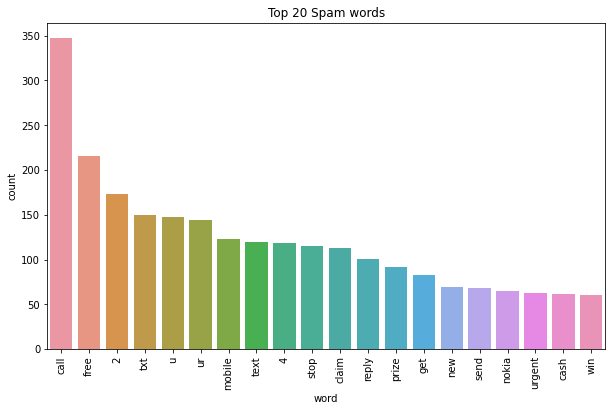

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top20, ax=ax)
plt.title("Top 20 Spam words")
plt.xticks(rotation='vertical');

#Bag of Words

In [52]:
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [53]:
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['input Text'])

In [54]:
print(len(bow_transformer.vocabulary_))

9532


This tell us that there are 9532 different words counted in the entire dataset.

In [55]:
sample_spam = data['input Text'][2]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)

print(bow_sample_spam)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 72)	1
  (0, 416)	1
  (0, 423)	1
  (0, 436)	1
  (0, 849)	1
  (0, 1242)	1
  (0, 2316)	1
  (0, 2541)	1
  (0, 3152)	2
  (0, 3290)	2
  (0, 3415)	1
  (0, 3571)	1
  (0, 5345)	1
  (0, 6738)	1
  (0, 6791)	1
  (0, 6848)	1
  (0, 8233)	1
  (0, 8398)	1
  (0, 8610)	1
  (0, 9117)	1
  (0, 9160)	1


In [56]:
print(bow_transformer.get_feature_names()[3152])
print(bow_transformer.get_feature_names()[3290])

entry
fa


In [57]:
# Applying the transformer to entire input data
bow_data = bow_transformer.transform(data['input Text'])

In [58]:
print('Shape of Sparse Matrix: ', bow_data.shape)
print('Amount of Non-Zero occurences: ', bow_data.nnz)

Shape of Sparse Matrix:  (5574, 9532)
Amount of Non-Zero occurences:  50111


Sparsity refers to a matrix of numbers that includes many zeros or values that will not significantly impact a calculation.

In [59]:
sparsity = (100.0 * bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


#TF-IDF

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transformer = TfidfTransformer().fit(bow_data)

In [62]:
data_tfidf = tfidf_transformer.transform(bow_data)